# Imports

In [6]:
%matplotlib inline
import sys
sys.path.insert(0, 'lib\\')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import WhittakerHendersonSmoothing

# Read data
Load fictious data.

In [7]:
data_unsmoothened = np.array(pd.read_csv('data\\raw_data.csv', encoding='ISO-8859-1'))

# Apply smoothing with default parameters
Leaving the tuning parameters at default level with smoothing parameters >> g=1 and m = 2 and
fitting parameter >> equally distributed weights.

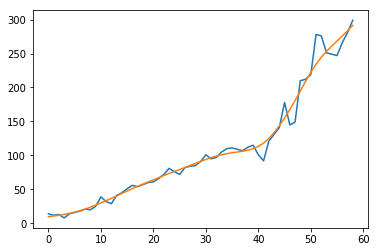

In [5]:
myWhitakterHenderson = WhittakerHendersonSmoothing.WhitakterHenderson()
myWhitakterHenderson.set_data_unsmoothened(data_unsmoothened)
myWhitakterHenderson.fit()
myWhitakterHenderson.plot_data()

# Impact of the smoothing parameter g
What happens if the smoothing parameter g is modefied ? 

In [7]:
myWhitakterHendersonContainer = []
g = [0,0.001,0.01,0.1,1,10,100,1000,10000]

for i in range(1, 8 + 1):
    myWhitakterHenderson = WhittakerHendersonSmoothing.WhitakterHenderson()
    myWhitakterHenderson.set_data_unsmoothened(data_unsmoothened)
    myWhitakterHenderson.set_g(g[i-1])
    myWhitakterHenderson.fit()
    myWhitakterHendersonContainer.append(myWhitakterHenderson)
    del myWhitakterHenderson

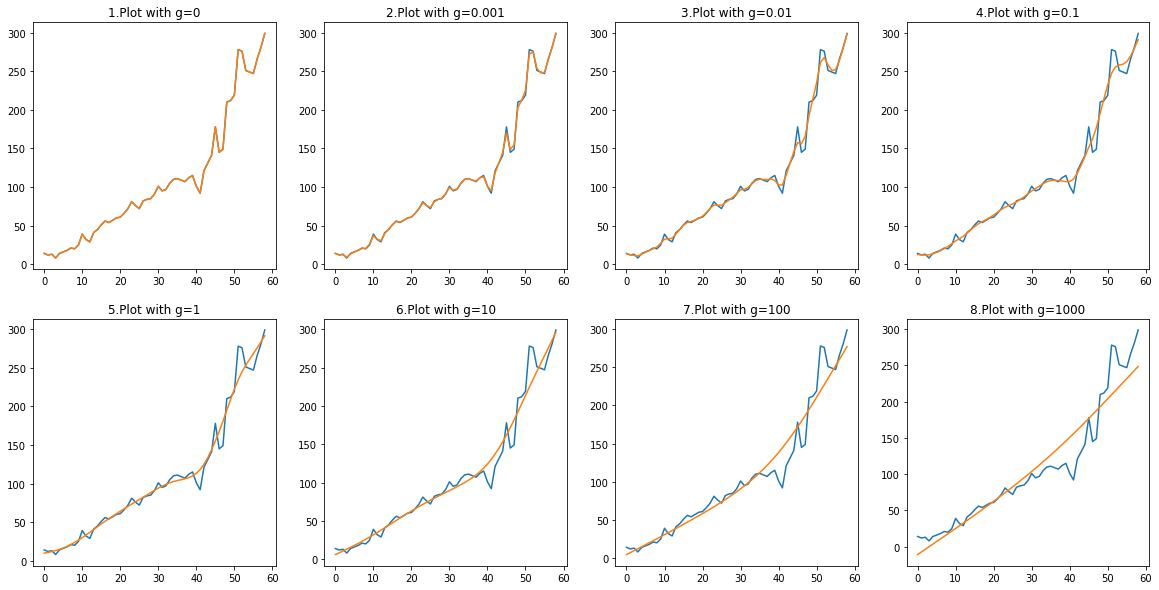

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize = (20, 10))

for i in range(1, 8 + 1):
    plt.subplot(2, 4, i)
    plt.plot(myWhitakterHendersonContainer[i-1].get_data_unsmoothened())
    plt.plot(myWhitakterHendersonContainer[i-1].get_data_smoothened())
    plt.title(str(i) + ".Plot with g=" + str(myWhitakterHendersonContainer[i-1].get_g()))

Applying a smoothing parameter of 0 fits the data 100% (eliminates the sum of differences from the optimization problem). On the other hand, increasing g leads finally to a linear function (maximum smoothness). Note: Finally linear is also dependent on m and on the specific structure of the data.  

# Impact of the smoothing parameter m
What happens if the smoothing parameter m is modefied ? 

In [9]:
myWhitakterHendersonContainer = []
m = [0,1,2,5,10,20,30,59]

for i in range(1, 8 + 1):
    myWhitakterHenderson = WhittakerHendersonSmoothing.WhitakterHenderson()
    myWhitakterHenderson.set_data_unsmoothened(data_unsmoothened)
    myWhitakterHenderson.set_m(m[i-1])
    myWhitakterHenderson.fit()
    myWhitakterHendersonContainer.append(myWhitakterHenderson)
    del myWhitakterHenderson

m needs to be per definition greater or equal to zero and smaller or equal to the data_length. m determines how many points are included (binomial coefficient) in the sum of the differences in the target function for each point.

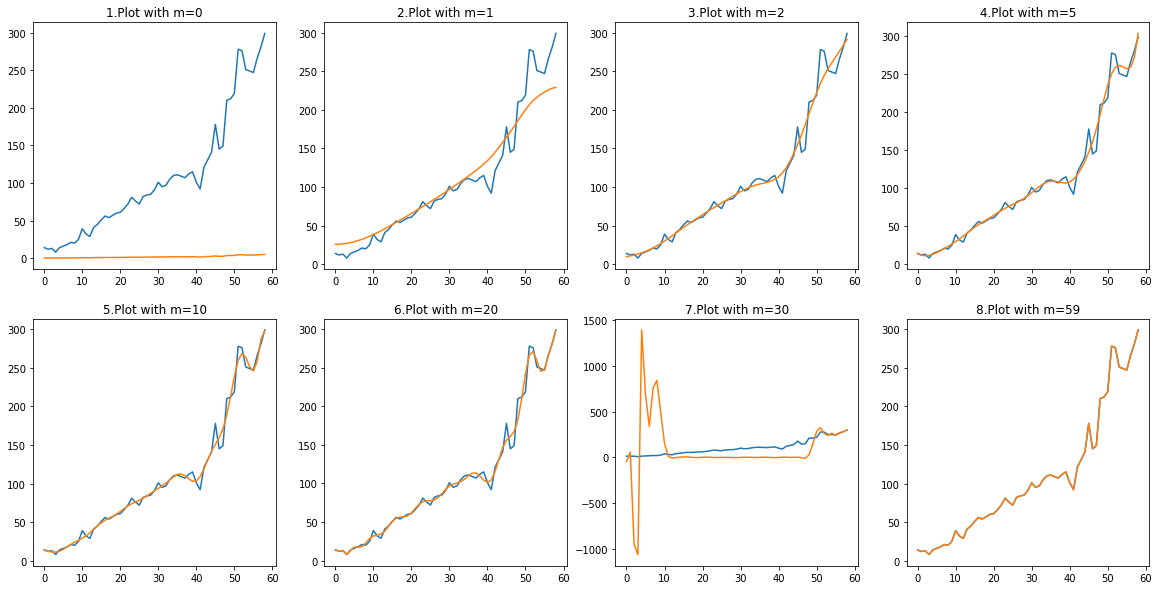

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize = (20, 10))

for i in range(1, 8 + 1):
    plt.subplot(2, 4, i)
    plt.plot(myWhitakterHendersonContainer[i-1].get_data_unsmoothened())
    plt.plot(myWhitakterHendersonContainer[i-1].get_data_smoothened())
    plt.title(str(i) + ".Plot with m=" + str(myWhitakterHendersonContainer[i-1].get_m()))

Applying a smoothing parameter of data_length fits the data 100%. An increasing m fits the specific structure of the data more and more. Note: m of 0 or 1 make no sense due to the fact that no neighbours are considered in the deltas; on the other hand, very large m's can also lead to no plausible results at all.

# Impact of the weights
What happens if the weights are modefied ? 

In [11]:
myWhitakterHendersonContainer = []
weights       = np.array(np.full(len(np.array(data_unsmoothened)), 1))
weights_at_41 = [1,2,5,10,25,100,1000,10000]

for i in range(1, 8 + 1):
    myWhitakterHenderson = WhittakerHendersonSmoothing.WhitakterHenderson()
    myWhitakterHenderson.set_data_unsmoothened(data_unsmoothened)
    weights[41] = weights_at_41[i-1]
    myWhitakterHenderson.set_weights(weights)
    myWhitakterHenderson.fit()
    myWhitakterHendersonContainer.append(myWhitakterHenderson)
    del myWhitakterHenderson

Increasing the weight at point 41 on the x-axis to increase the fit at that point.

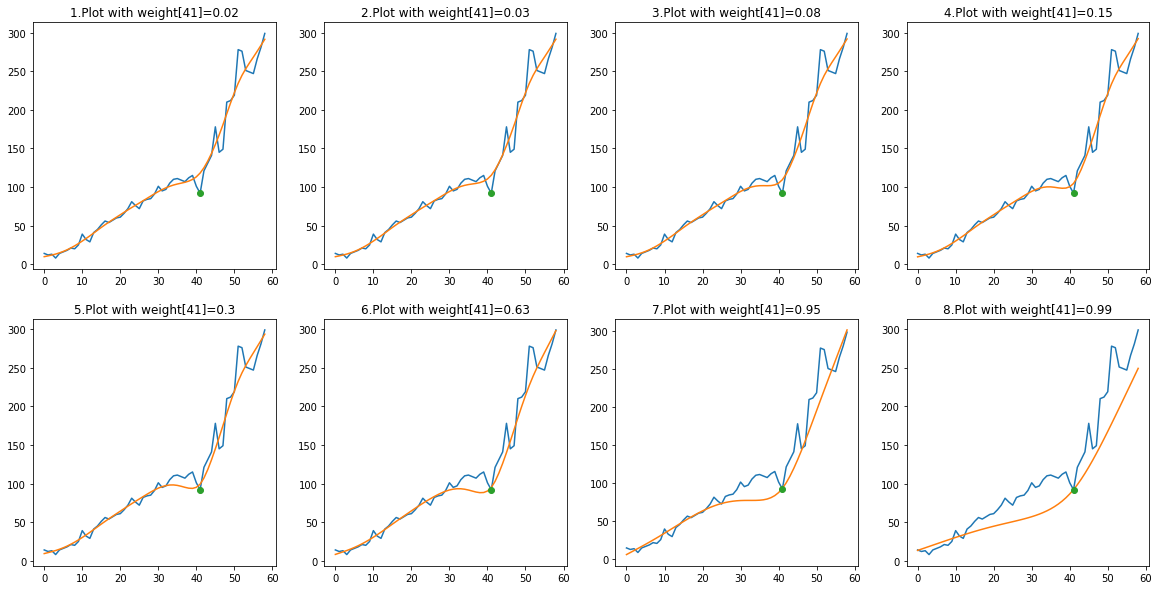

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize = (20, 10))

for i in range(1, 8 + 1):
    plt.subplot(2, 4, i)
    plt.plot(myWhitakterHendersonContainer[i-1].get_data_unsmoothened())
    plt.plot(myWhitakterHendersonContainer[i-1].get_data_smoothened())
    plt.plot(41, data_unsmoothened[41], 'o')
    weight_41   = float(myWhitakterHendersonContainer[i-1].get_weights()[41])
    weights_sum = float(myWhitakterHendersonContainer[i-1].get_weights().sum())
    plt.title(str(i) + ".Plot with weight[41]=" + str(round(weight_41 / weights_sum, 2 )))

Increasing the weight at point 41 (marked with a green circle) from 2% (1.Plot) to almost 100% (8.Plot).